#**Introduction:**

- This document outlines the basic steps involved in the **Segmentation task.**
- It uses the **McDonalds** dataset for the task.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Mount the drive for dataset file access


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/del - Fenny Labs/mcdonalds.csv')

### View data

In [ ]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


### View Columns of the dataset

In [ ]:
pd.Series(df.columns.tolist(), index=range(1, len(df.columns.tolist())+1), name="Columns in the McDonald's dataset")

,Columns in the McDonald's dataset
1,yummy
2,convenient
3,spicy
4,fattening
5,greasy
6,fast
7,cheap
8,tasty
9,expensive
10,healthy


### Number of data points

In [ ]:
print("Number of data points : ",df.shape[0])

Number of data points :  1453


### Check data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**- There are no NULL values in the data**

In [ ]:
df.iloc[:, [0, 1, 3, 4]].describe()

,yummy,convenient,fattening,greasy
count,1453,1453,1453,1453
unique,2,2,2,2
top,Yes,Yes,Yes,Yes
freq,803,1319,1260,765


In [ ]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


### Check for duplicate rows and remove if exists

In [ ]:
df.duplicated().sum()

22

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)
df_original = df.copy()

In [ ]:
df.duplicated().sum()

0

### Value counts - Unique values in each column

In [ ]:
# Common function to display value_counts() for Categorical Column
# And Five point summary (min/max values) for Numerical variables

def summarize_column(col):
    if col.dtype == 'object' or pd.api.types.is_categorical_dtype(col):
        return col.value_counts()
    else:
        return col.describe()

In [ ]:
# Function applied to multiple columns

summary = df.iloc[:,[0,1,2,3,4,5,6,7]].apply(summarize_column)
print(summary)

     yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty
No     645         133   1295        191     677   145    579    512
Yes    786        1298    136       1240     754  1286    852    919


In [ ]:
# Function applied to multiple columns

summary = df.iloc[:,[8,9,10]].apply(summarize_column)
print(summary)

     expensive  healthy  disgusting
No         915     1144        1081
Yes        516      287         350


In [ ]:
df.Gender.value_counts()

,count
Gender,
Female,772
Male,659


In [ ]:
# Create bins for the Age column
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create a new column for binned age
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Get the value counts of the binned age groups
df['age_group'].value_counts().reindex(labels)

,count
age_group,
0-20,44
20-40,547
40-60,617
60-80,223
80-100,0


In [ ]:
df.Like.value_counts()

,count
Like,
+3,225
+2,180
0,168
+4,156
+1,152
I hate it!-5,150
I love it!+5,140
-3,73
-4,70


In [ ]:
df.VisitFrequency.value_counts()

,count
VisitFrequency,
Once a month,427
Every three months,339
Once a year,252
Once a week,232
Never,128
More than once a week,53


**Note: The labels for "VisitFrequency"	and "Like" column are not in proper order. So lets reorder it.**

In [ ]:
unique_levels = df.Like.unique()
pd.Series(unique_levels)

,0
0,-3
1,+2
2,+1
3,+4
4,I love it!+5
5,I hate it!-5
6,-2
7,+3
8,0
9,-4


In [ ]:
# Reorder the levels as specified in the R code
reordered_levels = [unique_levels[i] for i in [4,3,7,1,2,8,10,6,0,9,5]]

# Display the value_counts() using the reordered labels
df.Like.value_counts().reindex(reordered_levels)

,count
Like,
I love it!+5,140
+4,156
+3,225
+2,180
+1,152
0,168
-1,58
-2,59
-3,73


**- Similar reordering can be done to "VisitFrequency" column**

#**EDA - Data Visulaization**

### Histogram for numerical variables

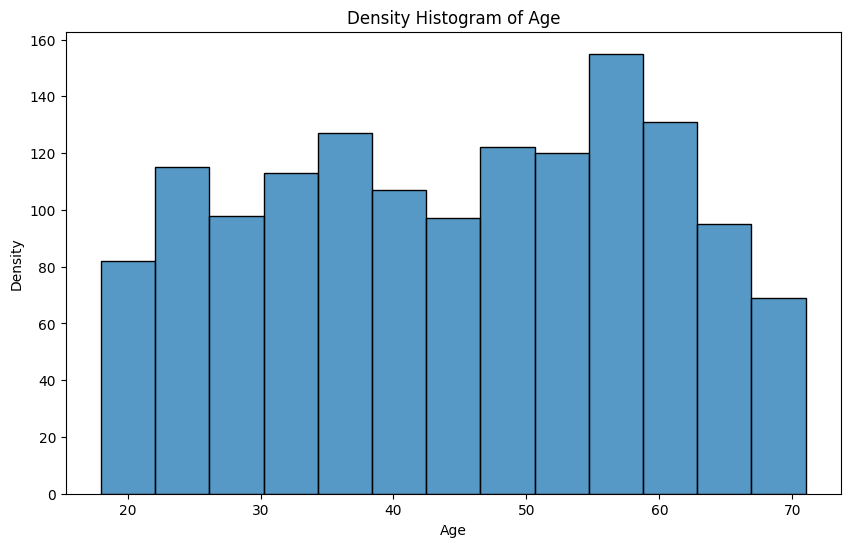

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Histogram of Age')

# Show the plot
plt.show()

**Histogram with defined bin size**

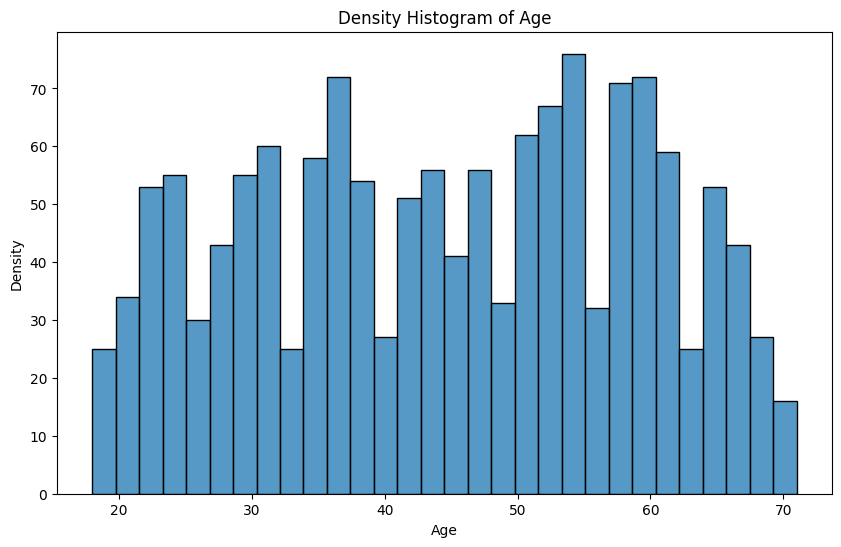

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Histogram of Age')

# Show the plot
plt.show()

**Using a countplot**

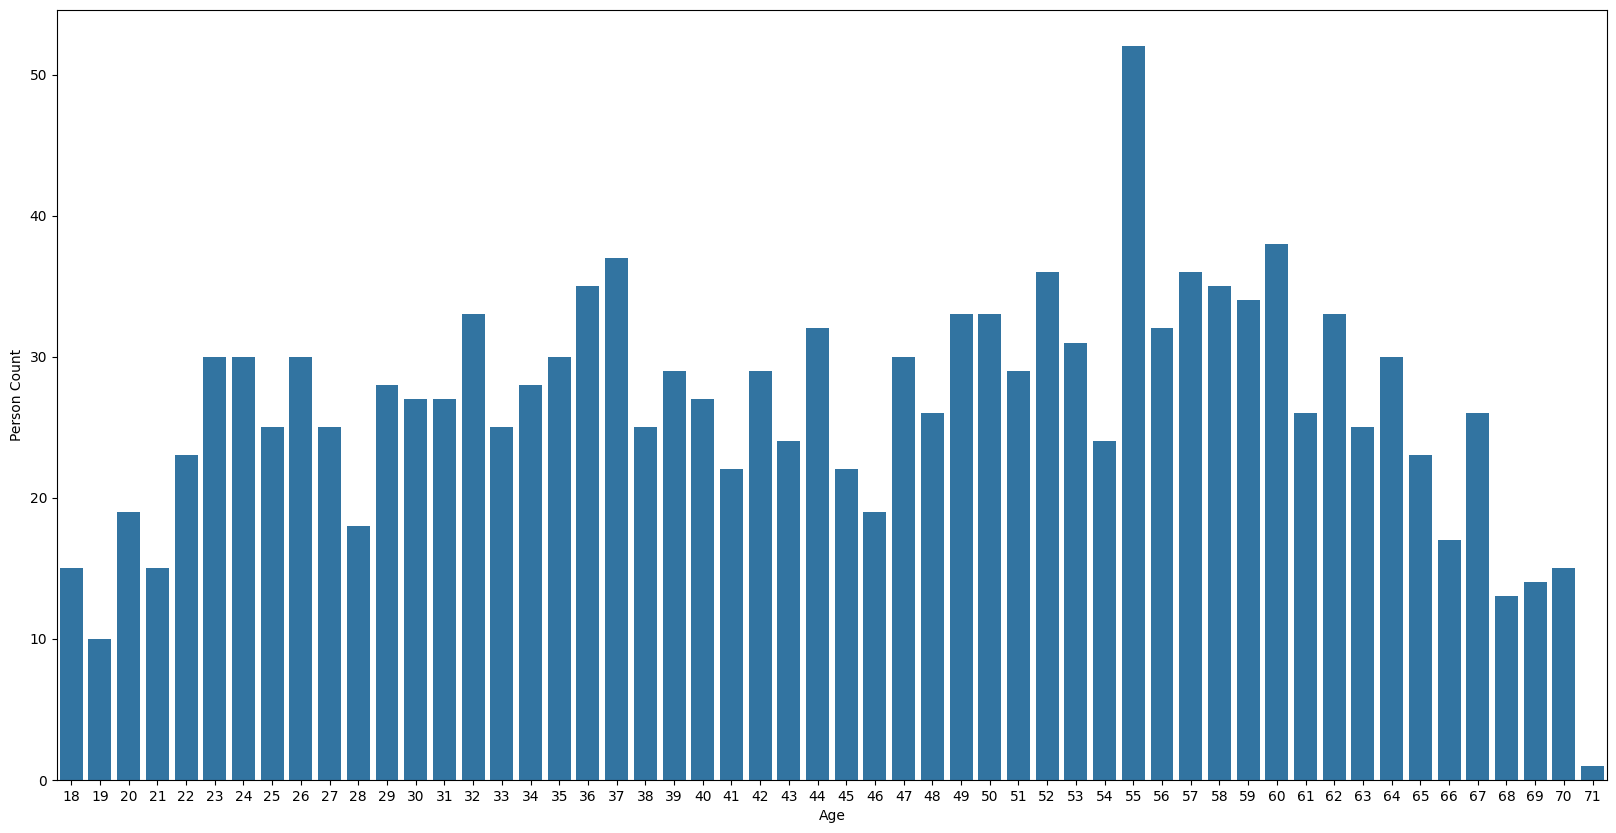

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Age", data = df)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

### Box plot

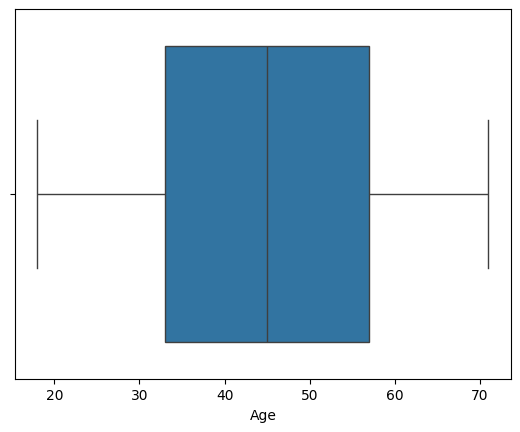

In [ ]:
sns.boxplot(data=df, x='Age');

### **Dot plot**
**- To visualize which attributes of McDonald's are most appealing to people**

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'age_group'],
      dtype='object')

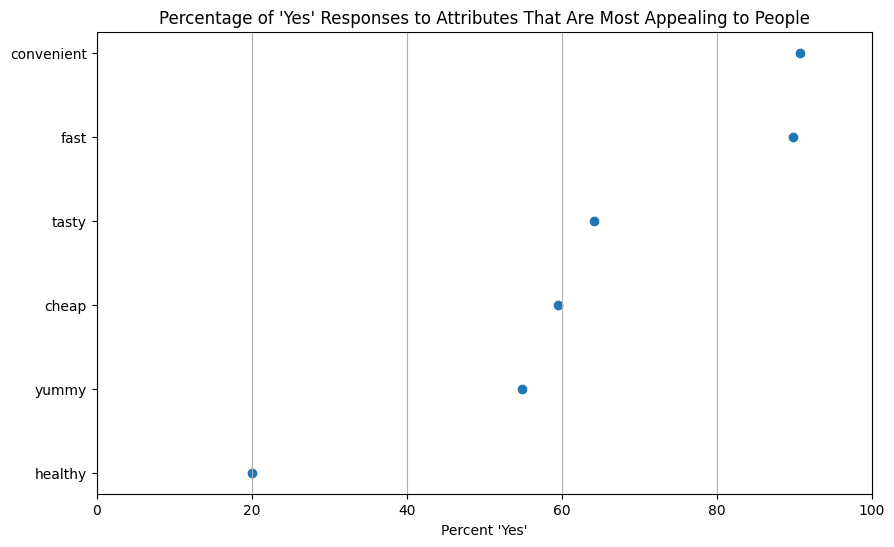

In [ ]:
# List of attributes that should be most appealing to the people
good_attributes = ['yummy', 'convenient', 'fast', 'cheap', 'tasty', 'healthy']

#  Get the indexes of the specified columns as integers
indexes = [df.columns.get_loc(col) for col in good_attributes if col in df.columns]

yes_percentages = 100 * df.iloc[:,indexes].apply(lambda x: (x == 'Yes').mean(), axis=0)

# Sort the percentages
yes_sorted = yes_percentages.sort_values()

# Create a dot chart
plt.figure(figsize=(10, 6))
plt.scatter(yes_sorted, range(len(yes_sorted)), marker='o')
plt.yticks(range(len(yes_sorted)), yes_sorted.index)
plt.xlabel("Percent 'Yes'")
plt.xlim(0, 100)
plt.title("Percentage of 'Yes' Responses to Attributes That Are Most Appealing to People")
plt.grid(axis='x')
plt.show()

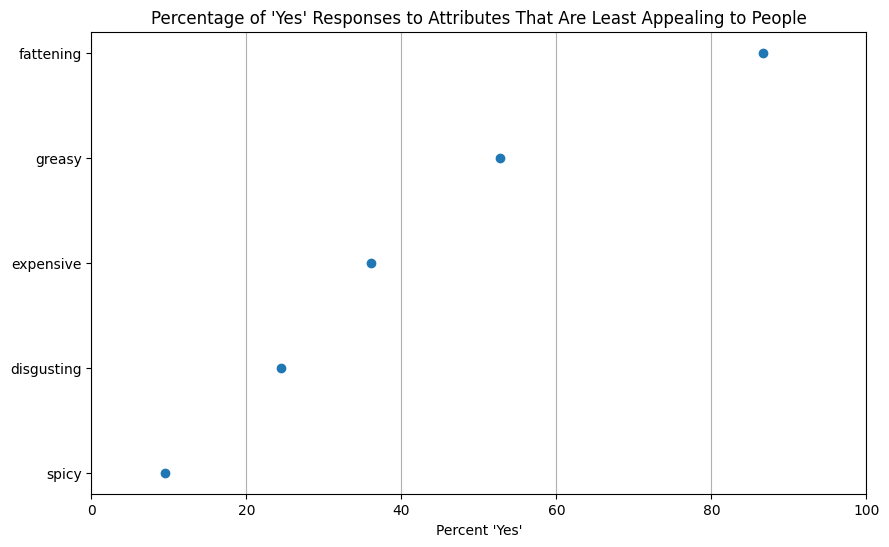

In [ ]:
# List of attributes that should be least appealing to the people
bad_attributes = ['spicy', 'fattening', 'greasy', 'expensive',  'disgusting']

#  Get the indexes of the specified columns as integers
indexes = [df.columns.get_loc(col) for col in bad_attributes]

yes_percentages = 100 * df.iloc[:,indexes].apply(lambda x: (x == 'Yes').mean(), axis=0)

# Sort the percentages
yes_sorted = yes_percentages.sort_values()

# Create a dot chart
plt.figure(figsize=(10, 6))
plt.scatter(yes_sorted, range(len(yes_sorted)), marker='o')
plt.yticks(range(len(yes_sorted)), yes_sorted.index)
plt.xlabel("Percent 'Yes'")
plt.xlim(0, 100)
plt.title("Percentage of 'Yes' Responses to Attributes That Are Least Appealing to People")
plt.grid(axis='x')
plt.show()

# Pre-processing


## Categorical Variables

### Merge categories with lower values
- This is required for the "Like" column.
- Categories below "0" rating have low values, so they can be merged together
- Two new categories (-1:-2 and -3:-4) would be created for 4 existing categories

In [ ]:
# Define a new category to merge categories of "Like" column
merge_dict = {
    '-1': '-1:-2',
    '-2': '-1:-2',
    '-3': '-3:-4',
    '-4': '-3:-4'
}

# Use replace to merge categories
df['Like'] = df['Like'].replace(merge_dict)


In [ ]:
# Reorder the labels in "Like" column to view frequncy counts in proper order
unique_levels = df.Like.unique()
reordered_levels = [unique_levels[i] for i in [4,3,1,2,8,6,0,5]]

# Display the value_counts() using the reordered labels
df.Like.value_counts().reindex(reordered_levels)

,count
Like,
I love it!+5,140
+4,156
+2,180
+1,152
0,168
-1:-2,117
-3:-4,143
I hate it!-5,150


### Convert categorical columns to numeric columns
- value "1" for "Yes" and "0" for "No"
- There are 11 categorical columns from index 0 to 10.

In [ ]:
df.iloc[:, 0:11] = (df.iloc[:, 0:11] == "Yes").astype(int)

## Numeric variables

### Data Scaling using Standardization
**- Note: If data has outliers, it is better to use Median and IQR for standardization instead of Mean and Std. dev.**  

- Only "Age" column is a numeric column in this dataset. It has no outliers. So we can use the StandardScaler class.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))